# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Akshat Johari

EID: aj32864

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) This term is the bias of the model. The variance is given by $E[g(x_0) - E[g(x_0]^2] $. The bias is how the model's estimate is different from the actual value at that point, whereas the variance is how the estimate of this point is different from the average estimated value of the model.


b) Bias is the inherent mistakes the model makes in the assumptions of the data. Variance is the error caused by a complex model trying to fit the data. The difference can be viewed graphically in the below image. A simple model, say a linear regression, will be unable to map data that is non-linear; this is due to inherent bias in the model. A more complex model, like the 7th degree polynomial used in Q2 of this assignment, will overfit the data - it will include even the noise in modelling, and will be a poor estimator of data in the test set. As you increase complexity of the model, the bias reduces and variance increases. This is the tradeoff between bias and variance. Selecting the model which has least error will be one that has some bias and some variance, but the combination of both gives the most accurate output.


In [55]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Junhua-Ding/publication/318432363/figure/fig3/AS:667604972761097@1536180837464/Visualizing-bias-and-variance-tradeoff-using-a-bulls-eye-diagram.ppm", width=1500, height=1500)

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [42]:
def plot_curves(x_train, y_train, x_test, y_test):
    degs = [2,4,7]
    cols = ['#b3b3b3', '#141a4f', '#c82027']
    train_mse = []
    test_mse = []
    print('\n')
    fig, ax = plt.subplots(1,1, figsize = [15,6])
    ax.scatter(x_train, y_train, c = '#006600', label = 'Training set', marker = 'x')
    ax.scatter(x_test, y_test, c = '#66ff33', label = 'Test set', marker = 'x')
    for i,j in enumerate(degs):
        plt.figure(figsize=(15,6))
        x = np.vander(np.squeeze(x_train),j+1)
        xt = np.vander(np.squeeze(x_test),j+1)
        lrp.fit(x,y_train)
        pred_train = lrp.predict(x)
        pred_test = lrp.predict(xt)
        y_all = lrp.predict(np.vander(np.squeeze(x_all),j+1))
        print('-'*50, '\nMean square error for train data using polynomial of order', j, ':', mean_squared_error(y_train,pred_train))
        print('-'*50, '\nMean square error for test data using polynomial of order', j, ':', mean_squared_error(y_test,pred_test))
        ax.plot(x_all, y_all, label = 'Degree %d polynomial (all data points)' % j, c = cols[i])
        ax.scatter(x_test, pred_test, label = 'Degree %d polynomial (test data)' %j, c = cols[i])
        ax.legend(loc=9)
        ax.set_ylim([-35,35])
        ax.set_xlim([-5,5])
        train_mse.append(mean_squared_error(y_train,pred_train))
        test_mse.append(mean_squared_error(y_test,pred_test))
    ax.title.set_text('Plot of training and test data, and various plots using different polynomial models')
    # ax2.title.set_text('Plot of x_test vs predicted value of x_test using different polynomial models')
    plt.show()
    return train_mse, test_mse



-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 247.2967979737153
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 320.06408346977855
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 31.720018057290055
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 31.292082886606725
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 30.677193592109717
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 33.4106940776901


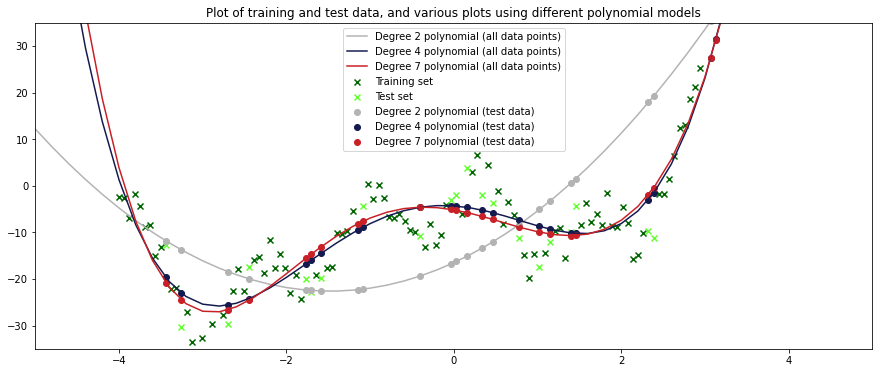

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [43]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

#### (b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

The model of order 4 gives the best performance. Note that if you look only at the training set MSE, it looks as if the more complex (7th order) model gives the best results. However, the results for the same model on the test dataset show us that the low error was due to overfitting the training set, and that the model is worse in predicting new data. We know that there is a tradeoff between bias and variance - a more complex model has higher variance as can be seen from the formula  
Err(x)=(E[f^(x)]−f(x))2+E[(f^(x)−E[f^(x)])2]+σ2e

A low complexity model will have higher bias - it is more likely to underfit the data and not perform as a good predictor. High complexity leads to the model passing through more of the (training) data points, which results in a poorly performing model on test data. [This image](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png) provides a graphical representation of the concept of bias-variance tradeoff, and how it relates with model error. Any model we design needs to incorporate this tradeoff to select the optimal solution.


#### (c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.


20% data


-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 161.1714737883004
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 402.32312690992876
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 35.115113139129775
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 38.34074498344278
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 22.543946691373346
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 135.2076452675657


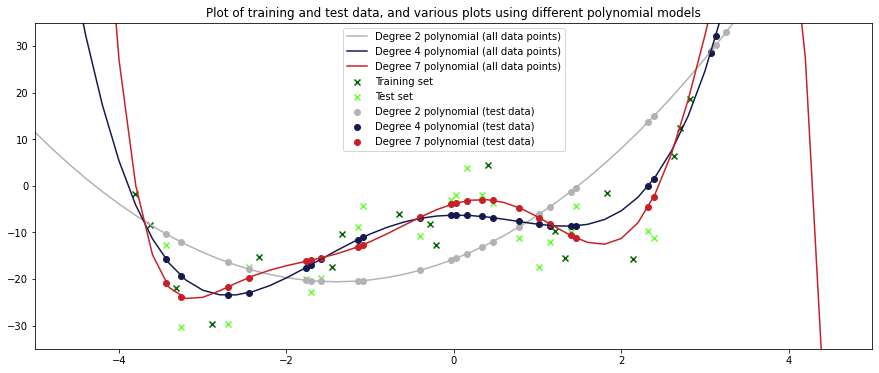

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>


40% data


-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 150.33251286085704
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 405.80516696165773
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 31.624529646446895
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 33.16428295918739
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 25.492718751653634
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 61.23741884551114


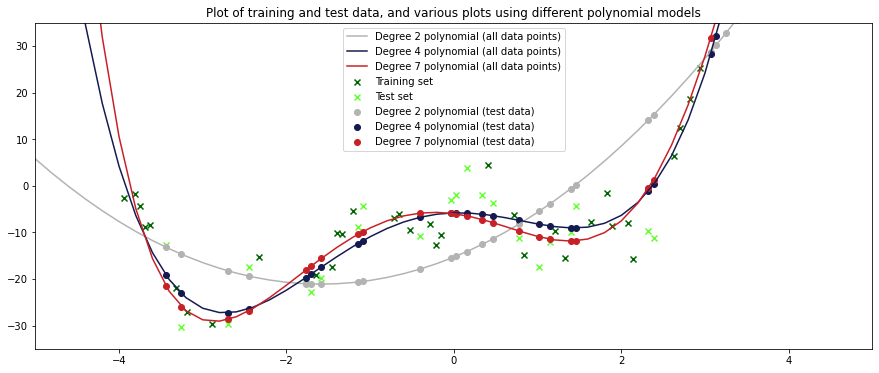

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>


60% data


-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 150.08383759141728
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 403.2513784833407
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 29.192805739947907
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 31.78141541619673
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 26.09908864245441
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 60.16667237664524


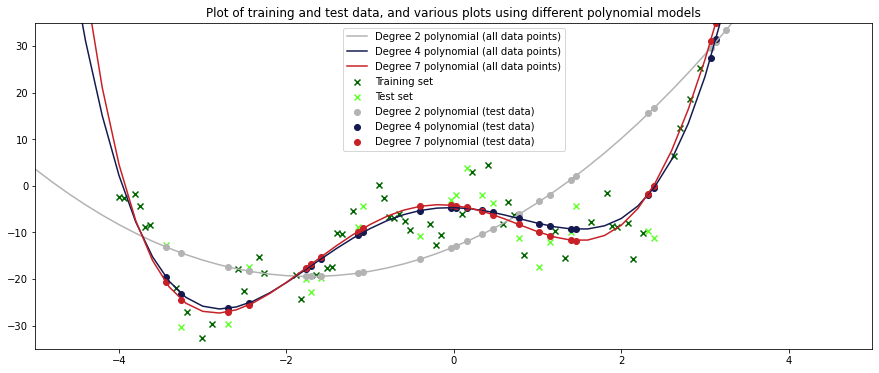

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>


80% data


-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 168.1188246150281
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 407.59369688184694
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 29.305108483323448
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 32.518106868742635
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 26.54912959628363
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 48.0769352971074


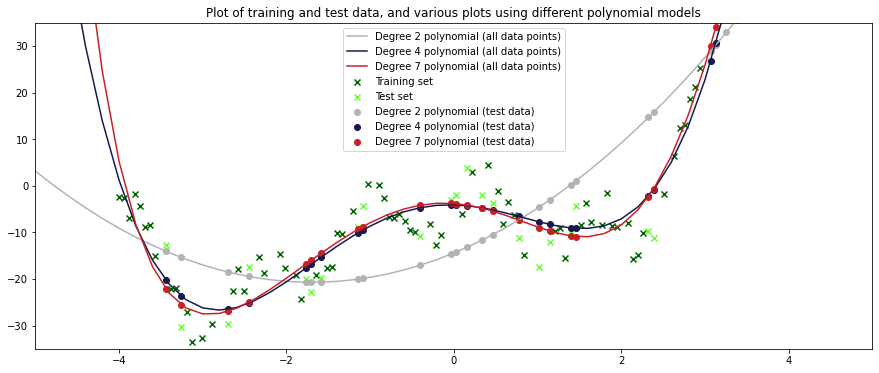

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>


100% data


-------------------------------------------------- 
Mean square error for train data using polynomial of order 2 : 247.2967979737153
-------------------------------------------------- 
Mean square error for test data using polynomial of order 2 : 320.06408346977855
-------------------------------------------------- 
Mean square error for train data using polynomial of order 4 : 31.720018057290055
-------------------------------------------------- 
Mean square error for test data using polynomial of order 4 : 31.292082886606725
-------------------------------------------------- 
Mean square error for train data using polynomial of order 7 : 30.677193592109717
-------------------------------------------------- 
Mean square error for test data using polynomial of order 7 : 33.4106940776901


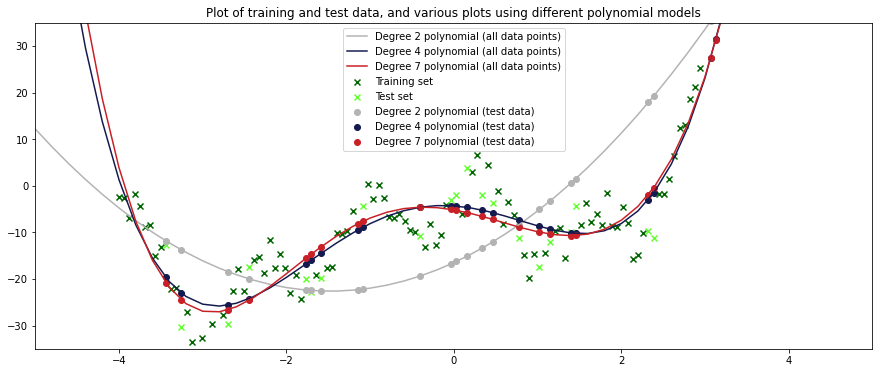

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [44]:
from math import log
# Study the effects of the training data size on the bias and variance
print("\n20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("\n40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("\n60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("\n80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("\n100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)


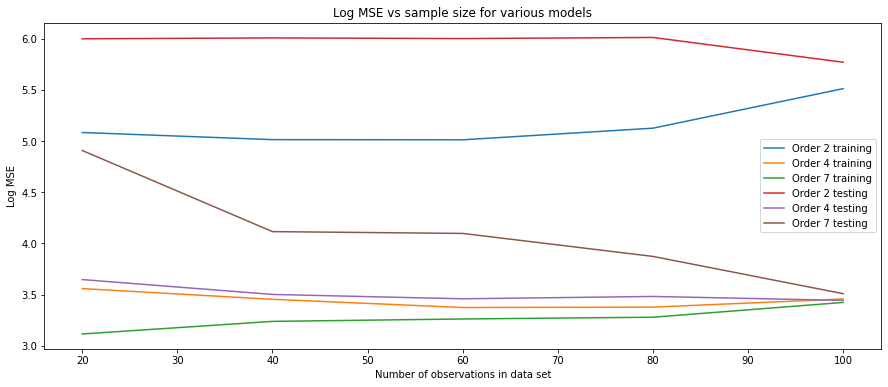

In [45]:
import pandas as pd
plt.figure(figsize = [15,6])

train2 = pd.Series([train_rmses_20[0], train_rmses_40[0], train_rmses_60[0], train_rmses_80[0], train_rmses_100[0]])
train4 = pd.Series([train_rmses_20[1], train_rmses_40[1], train_rmses_60[1], train_rmses_80[1], train_rmses_100[1]])
train7 = pd.Series([train_rmses_20[2], train_rmses_40[2], train_rmses_60[2], train_rmses_80[2], train_rmses_100[2]])
test2 = pd.Series([test_rmses_20[0], test_rmses_40[0], test_rmses_60[0], test_rmses_80[0], test_rmses_100[0]])
test4 = pd.Series([test_rmses_20[1], test_rmses_40[1], test_rmses_60[1], test_rmses_80[1], test_rmses_100[1]])
test7 = pd.Series([test_rmses_20[2], test_rmses_40[2], test_rmses_60[2], test_rmses_80[2], test_rmses_100[2]])

lens = pd.Series([20,40,60,80,100])

plt.plot(lens, np.log(train2), label = 'Order 2 training')
plt.plot(lens, np.log(train4), label = 'Order 4 training')
plt.plot(lens, np.log(train7), label = 'Order 7 training')
plt.plot(lens, np.log(test2), label = 'Order 2 testing')
plt.plot(lens, np.log(test4), label = 'Order 4 testing')
plt.plot(lens, np.log(test7), label = 'Order 7 testing')

plt.title('Log MSE vs sample size for various models')
plt.xlabel('Number of observations in data set')
plt.ylabel('Log MSE')

plt.legend(loc = 5)
plt.show()

As can be seen from the above plot, the order of training MSE is 2 > 4 > 7, and test is 2 > 7 > 4, showing that order 7 is overfitting, and 2 is underfitting. The increase in training error as we increase the size of the sample is a characteristic of this particular dataset, it is not what you would generally expect to see. Test error decreases with increase in the sample size.

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a) Gradient descent is an algorithm which looks at the entire dataset, and then takes the single best step possible to reduce the error in the prediction. Conversely, stochastic gradient descent looks at just one training example, and makes the best step possible. Due to this, stochastic gradient descent executes comparably faster than batch gradient descent. However, one issue is that stochastic gradient descent might end up oscillating around the minimum value of the error, whereas gradient descent will converge to the minimum value. Another is that gradient descent might get stuck at the local minima, whereas the 'noise' in stochastic gradient descent may allow it to 'jump' out of the local minima and head towards either a better local minima, or the global minima.  

b) The Nelder-Mead method is a way of reducing error, by taking dynamic step sizes. If the new step is in better than any previous reduction by a step, the step size is increased. If the step results in a worse reduction in the error, the step size is reduced, because this implies we are nearing the minima, and might start oscillating/already be in an oscillating scenario. Assume you are driving to a friend's house, and you know the general direction of where her house is. Initially, you check the address of the house next to the road every 500m. If you are still going in the right direction, you begin looking for houses every mile. If you are going in the wrong direction, you turn around am=nd begin looking every 200 meters. This is essentially what the Nelder-Mead method is doing.  
The major problem Nelder-Mead faces is how to determine the correct direction in multi-dimensional space, which is often the environment most machine learning models operate in. Nelder-Mead starts to fail in problems with more than a dozen or so parameters. 

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

$$ MSE = (t - y)^2 $$  
Weights are updated as $$ w_n \rightarrow w_n + \eta * \frac{\partial(t - y)^2}{\partial w_n} $$

$$ \frac{\partial MSE}{\partial w_n} = -2y \frac{\partial y}{\partial w_n}$$

$$\frac{\partial y}{\partial w_0} = 1 $$    
$$\frac{\partial y}{\partial w_1}= x_1 $$  
$$\frac{\partial y}{\partial w_2}= x_1 x_2 $$  
$$\frac{\partial y}{\partial w_3}= e^{-x_1} $$  


Therefore, updated weights:  
$w_0^* = w_0 - 2 (w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}) * \eta * 1$  
$w_1^* = w_1 - 2 (w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}) * \eta * x_1$  
$w_2^* = w_2 - 2 (w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}) * \eta * x_1 x_2$  
$w_3^* = w_3 - 2 (w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}) * \eta * e^{-x_1}$  

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef # = please put your codes here to update the self.coef using SGD
        
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here

                # Compute gradients
                    #please put your codes here
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return None #this line is just a placeholder, please delete this line in your code        

In [ ]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

In [46]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate * gradient)
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                xi = X[i,:]
                error = self.linearPredict(xi) - y[i]
                c = 2 * error
                # Compute gradients
                gradient = np.array([c * xi[0] + 2 * self.regularization * self.coef[0], 
                                     c * xi[1] + 2 * self.regularization * self.coef[1], 
                                     c * xi[2] + 2 * self.regularization * self.coef[2], 
                                     c * xi[3] + 2 * self.regularization * self.coef[3]])
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend(loc = 'best')
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return X.dot(self.coef)    

In [47]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [48]:
import warnings
warnings.filterwarnings('ignore')

rates = []
for i in regularization:
    for j in learning_rate:
        rates.append([i,j])

mses = []

for i in range(len(rates)):
    var = Regression(rates[i][1], rates[i][0], n_epochs)
    var.fit(X,y,False)
    mses.append(var.lowest_mse)

Best Learning Rate 1 : 0.01
Best Regularization Rate 1 : 0
MSE: 0.02744454800243015
Best Learning Rate 2 : 0.001
Best Regularization Rate 2 : 0
MSE: 0.028842167362254173


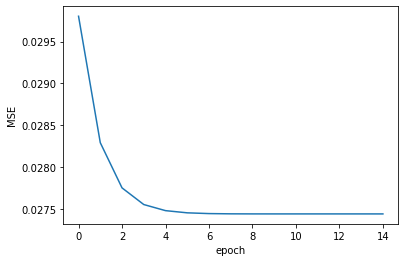

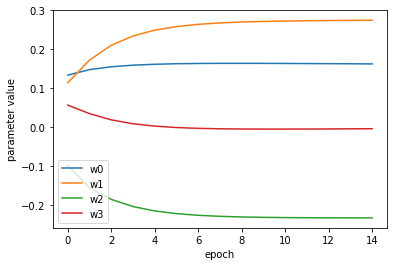

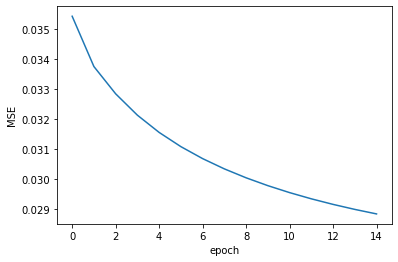

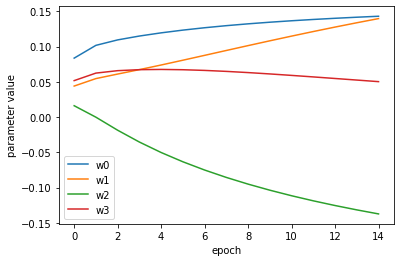

In [56]:
ids = list(np.argsort(np.array(mses))[:2])

for i,j in enumerate(ids):
    print('Best Learning Rate', str(i+1), ':', rates[j][1])
    print('Best Regularization Rate', str(i+1), ':', rates[j][0])
    obj = Regression(rates[j][1], rates[j][0], n_epochs)
    obj.fit(X,y,plot = True)
    print("MSE:", obj.lowest_mse)